# Data Science Pragmatic programming in Python


Code snippets for quick consult (copy n paste)

In [2]:
import os
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
!pwd

/home/leandroohf/Documents/leandro/ds_pragmatic_programming


## Bash

### Random sample

In [ ]:
%%bash 
# take random sample of lines in file (log analysys was useful)

shuf data/FremontBridge.csv | head -n 3 


### Filter with grep

In [ ]:
%%bash 

# Use grep to filter out pattern
cat data/FremontBridge.csv | grep -v 2013 | head -n 5

echo
# keep only 2013 and ignore case sensitive
cat data/FremontBridge.csv | grep -i 2013 | head -n 5

# Using regular expression (start with 12)
echo
cat data/FremontBridge.csv | grep -E "^12" | head -n 5

### run process in parallel

Use pararlels to speedup bash


In [ ]:
# Creating scripts

bash_str = """\
ffmpeg -y -i data/audio0_hH79HnEdo.wav data/audio0_hH79HnEdo.flac
ffmpeg -y -i data/audio0KCVgexi4yU.wav data/audio0KCVgexi4yU.flac
ffmpeg -y -i data/audio0Q1JLNfm8oU.wav data/audio0Q1JLNfm8oU.flac
ffmpeg -y -i data/audio0vm7UpkSOnk.wav data/audio0vm7UpkSOnk.flac
ffmpeg -y -i data/audio2M9GSksX_ho.wav data/audio2M9GSksX_ho.flac
"""

!echo "{bash_str}"   > convert.sh 
!chmod u+x convert.sh

!cat convert.sh

In [ ]:
# serial
!time ./convert.sh

In [ ]:
# parallel will run every line as a separate command in parallel
!/usr/bin//parallel -a ./convert.sh

In [ ]:
# piping version
!ls data/*.wav | parallel ffmpeg -i {} {.}.flac

## Notebooks tricks 


* *Install conda enviroment in jupyter notebook*


```sh
# activate the env
source activate myenv

# install ipiykernel in the environment
conda install ipykernel

# jupyter will auto-detect all environments
# In case it fails you can run
python -m ipykernel install --user --name myenv


```

* Set jupyter notebook to save a copy as Rmd

refs: https://towardsdatascience.com/version-control-with-jupyter-notebooks-f096f4d7035a

Why?  

* R-Markdown is the same as markdown format with added advantage that you can make publishing worthy pdf/word-doc 
* git diff renders well is human readable (Cons duplicated the numner of files)



Install pytext (requirment to save as Rmd)
```sh
pip install jupytext --upgrade
```

Edit jupyter conf file: jupyter/jupyter_notebook_config.py

```txt
c.NotebookApp.contents_manager_class="jupytext.TextFileContentsManager"
c.ContentsManager.default_jupytext_formats = ".ipynb,.Rmd"
```


Add this magic command in the first cell


```python
%autosave 0
```


* *Install kernel enviroment in jupyter notebook *

* *Run notebook in remote jupyter server*


```sh
# run in thew remote machine
jupyter notebook --no-browser --port 8889

# run local machine
ssh -N -f -L localhost:8888:localhost:8889 datalab@172.21.1.4

# Copy token from the remote machine shell
# access jupyter notebook
http://localhost:8888/?token=054a85cc962d8c7ee5ba99517bfc5303020c7e2736f4b268

```

This can help with interacting with shell
* share variables between python and bash cell

In [ ]:
python_var = 'test1'
var_test2 = 10.3

# Option 1
data =  './mydata'

!mkdir -p {data}

In [ ]:
%%bash -s "$python_var" "$var_test2" "position_3"

echo $1
echo $2
echo $3
echo $data ## will not work

* define enviroment variable shared between bash cells

In [3]:
%env MY_VAR=env_test_var
%env  v1=$python_var

env: MY_VAR=env_test_var
env: v1=$python_var


In [4]:
%%bash 

echo $MY_VAR
echo $v1

env_test_var
$python_var


* Share variables between notebooks

In [ ]:
# Notebook 1 (Should be ran first)
# Define the var
share = 'This is shared variable'


# Make the varaible Global between notebooks
%store share 

# Notebook 2 
# Read global variable
%store -r share


* **Run R code in cell**

In [ ]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [ ]:
%%R -i df -w 3 -h 2 --units in -r 200
# import df from global environment
# make default figure size 3 by 3 inches with 200 dpi resolution

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

## Iterate over folders

ref: https://www.newbedev.com/python/howto/how-to-iterate-over-files-in-a-given-directory/

In [42]:
!ls images

add_data.png		     no_data_pipeline.png
biasvariance.png	     non-linear_and_linear_decision_edge.png
data_frame.png		     notebook_vs_code.png
hig_bias_low_variance.png    onehot.png
iris_petal_sepal.png	     pathlib_cheatsheet_p1.png
irr_error.png		     pivot-table-datasheet.png
layers.jpeg		     refactor_notebooks.png
learning_rate2.png	     resampling.png
learning_rate.png	     smote.png
loss_learning_rate.png	     split-apply-combine.png
low_high_var.png	     tomek.png
minibatch_learning_rate.png  with_data_pipeline.png
neuron_ANN.png


In [37]:
root_folder = r'.'

for subdir, dirs, files in os.walk(root_folder):
    
    print('subdir: {}'.format(subdir))
    print('dir: {}'.format(dirs))
    print('files: {}'.format(files))
    
    
    for file_name in files:
        
        file_path = os.path.join(subdir, file_name)
        print('file_path: {}'.format(file_path))

subdir: .
dir: ['data', '__pycache__', '.git', '.ipynb_checkpoints', 'images']
files: ['tensorflow_requirements.txt', 'ds_pragmatic_programming_modelling.ipynb', 'ds_pragmatic_programming_NLP.ipynb', 'text_utils.py', 'ds_pragmatic_programming_code_best_practices.ipynb', 'ds_pragmatic_programming_python.ipynb', 'ds_pragmatic_programming_python_time_series.ipynb', 'requirements.txt', 'postBuild', 'utils.py', 'ds_pragmatic_programming_python_visualization.ipynb', 'ds_pragamatic_mongo_db.ipynb', 'ds_pragmatic_programming_SQL.ipynb', 'tensorflow_cpu.yml', 'ds_pragmatic_programming_deeplearning.ipynb', 'README.md', 'Dockerfile-spark', 'ds_pragmatic_programming_geodata.ipynb', 'Dockerfile', 'ds_pragmatic_programming_graph_data.ipynb', 'ds_pragmatic_programming_spark.ipynb']
file_path: ./tensorflow_requirements.txt
file_path: ./ds_pragmatic_programming_modelling.ipynb
file_path: ./ds_pragmatic_programming_NLP.ipynb
file_path: ./text_utils.py
file_path: ./ds_pragmatic_programming_code_best_prac

In [47]:
import glob

# Print png images 
for file_path in glob.iglob(r'./*/*.png'):
    print(file_path)
    
print()
# Print jpeg images 
for file_path in glob.iglob(r'./images/*.jpeg'):
    print(file_path)

./images/resampling.png
./images/minibatch_learning_rate.png
./images/pivot-table-datasheet.png
./images/neuron_ANN.png
./images/data_frame.png
./images/iris_petal_sepal.png
./images/tomek.png
./images/non-linear_and_linear_decision_edge.png
./images/learning_rate2.png
./images/smote.png
./images/no_data_pipeline.png
./images/pathlib_cheatsheet_p1.png
./images/with_data_pipeline.png
./images/refactor_notebooks.png
./images/biasvariance.png
./images/hig_bias_low_variance.png
./images/learning_rate.png
./images/loss_learning_rate.png
./images/split-apply-combine.png
./images/low_high_var.png
./images/irr_error.png
./images/onehot.png
./images/notebook_vs_code.png
./images/add_data.png

./images/layers.jpeg


## Generate data 

* random numbers generation
* generate data
* load data sets (toy)

http://scikit-learn.org/stable/datasets/index.html

### Gen random numbers

* uniform
* normal
* multivariate
* bolean
* integer

In [ ]:
## random numbers
np.random.seed(seed=2018)

n = 3
a = np.random.rand(n,n)

# random boolean
b = np.random.uniform(size=3) > .5
b

# uniform
u = np.random.uniform(size=3)
u

# random int
i = np.random.randint(0,9,size=3)
i

# random choice
c = np.random.choice(['a','b','c','e'],size=7)
c

# normal
n = np.random.normal(size=5)
n

# multivariated normal 2d;
_mean = (1, 2)
_cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(_mean, _cov, 3 )
m.shape
m

### Create dataframes

In [ ]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

pd.DataFrame.from_dict(data)


data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')



# HOW to fixe: If using all scalar values, you must pass an index
# pd.DataFrame.from_dict({'col1': 1, 'col2': 3}) # <= RUN THIS LINE TO SEE THE ERROR
#pd.DataFrame({'A': 1, 'B': 2}) # # <= RUN THIS LINE TO SEE THE ERROR
pd.DataFrame({'A': 1, 'B': 2}, index=[0])

# OR
pd.DataFrame({'A': [1], 'B': [2]})

### Gen data for classifications and clustering

Shameless stolen from:
http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py


* **make_classification** create multiclass datasets by allocating each class one or more **normally-distributed** clusters of points

   make_classification introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

In [ ]:
## classification (normal distributed)
from sklearn.datasets import make_classification

plt.figure(figsize=(10, 15));

plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95);

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.subplot(321);
plt.title("One informative feature, one cluster per class", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)

plt.subplot(322);
plt.title("Two informative features, one cluster per class", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');


X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)

plt.subplot(323);
plt.title("Two informative features, two clusters per class",
          fontsize='small');

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

plt.subplot(324);
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

plt.show();

* **make_blobs**: Generate isotropic (uniformity in all orientations) Gaussian blobs for clustering. 

* **make_gaussian_quantiles**: Generate isotropic Gaussian and label samples by quantile

In [ ]:
## Blobs n gaussian qunatiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_blobs(n_features=2, centers=3, random_state=2018)

plt.figure(figsize=(11,5));

ax1 = plt.subplot(121);
plt.title("Three blobs", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3,n_samples=256,random_state=2018)

ax2 = plt.subplot(122);
plt.title("Gaussian divided into three quantiles", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

ax2.set_xlim(-4,4);
ax2.set_ylim(-4,4);

plt.show()

* **make_circles**: Make a large circle containing a smaller circle in 2d.

* **make_moons**: Make two interleaving half circles

In [ ]:
## Clustering
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2018)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8));

ax1 = plt.subplot(121,aspect='equal');
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax1.set_title("Circle Data (2d)");
ax1.set_xticks(());
ax1.set_yticks(());


X, y = make_moons(n_samples=400, noise=.05,random_state=2018)

ax2 = plt.subplot(122,aspect='equal');
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax2.set_title("Moons Data (2d)");
ax2.set_xticks(());
ax2.set_yticks(());

plt.tight_layout();
plt.show;


### Load data sets


* **load_iris** Load and return the iris dataset (classification).

<img src="images/iris_petal_sepal.png" width="250" align="left"/>


In [ ]:
## datasets

from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print('data size: {}'.format(X_iris.shape))
print('features: {}'.format(iris.feature_names))
print('labels: {}'.format(iris.target_names))

print()

plt.figure(2, figsize=(4, 3));
plt.clf();

# Plot 
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, cmap=plt.cm.Set1,
            edgecolor='k');
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

* **load_boston**: Load and return the boston house-prices dataset (regression).

In [ ]:
# Boston house pricing

from sklearn.datasets import load_boston

boston = load_boston()

print('data size: {}'.format(boston.data.shape))
print('features: {}'.format(boston.feature_names))

# convert to data frame (but may times is not necessary)
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df['target'] = boston.target

boston_df.head(4)

In [ ]:
data = pd.read_csv('data/phone_data.csv')

data.shape
data.head(5)

## Read and write data

* pandas
* dict
* file handle


### Pandas

* **read from compressed csv**

In [ ]:
# See the first rows
pd.read_csv('data/phone_data.csv', nrows=2).head()
pd.read_csv('data/phone_data.csv', sep=',',header=None, index_col=False).head()

## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

creditcard_df.head(3)

* **read from sql db**

In [ ]:
# reads from database
import pandas as pd
import sqlite3

#conn = sqlite3.connect("data/flights.db")
with sqlite3.connect("data/flights.db") as conn:
    df = pd.read_sql_query("select * from airlines limit 11;", conn)
    
df.head(3)

In [ ]:
df = pd.read_csv('data/phone_data.csv', index_col=False)

df.columns
df.drop('index',axis=1,inplace=True)

df.head(3)

In [ ]:
df.to_csv('tmp.csv',index=False)

!head tmp.csv

### Basic and dict IO



* **process all files in folder**

In [14]:
import glob


notebooks = [x for x in glob.glob('*.ipynb')]

notebooks

for name in glob.glob('images/*.png'):
    print(os.path.basename(name))

    
print()

directory = './'

for filename in os.listdir(directory):
    
    print(filename)

['ds_pragmatic_programming_modelling.ipynb',
 'ds_pragmatic_programming_NLP.ipynb',
 'ds_pragmatic_programming_code_best_practices.ipynb',
 'ds_pragmatic_programming_python.ipynb',
 'ds_pragmatic_programming_python_time_series.ipynb',
 'ds_pragmatic_programming_python_visualization.ipynb',
 'ds_pragamatic_mongo_db.ipynb',
 'ds_pragmatic_programming_SQL.ipynb',
 'ds_pragmatic_programming_deeplearning.ipynb',
 'ds_pragmatic_programming_geodata.ipynb',
 'ds_pragmatic_programming_graph_data.ipynb',
 'ds_pragmatic_programming_spark.ipynb']

resampling.png
minibatch_learning_rate.png
pivot-table-datasheet.png
neuron_ANN.png
data_frame.png
iris_petal_sepal.png
tomek.png
non-linear_and_linear_decision_edge.png
learning_rate2.png
smote.png
no_data_pipeline.png
pathlib_cheatsheet_p1.png
with_data_pipeline.png
refactor_notebooks.png
biasvariance.png
hig_bias_low_variance.png
learning_rate.png
loss_learning_rate.png
split-apply-combine.png
low_high_var.png
irr_error.png
onehot.png
notebook_vs_code.png
add_data.png

tensorflow_requirements.txt
ds_pragmatic_programming_modelling.ipynb
data
ds_pragmatic_programming_NLP.ipynb
.git
ds_pragmatic_programming_code_best_practices.ipynb
.ipynb_checkpoints
ds_pragmatic_programming_python.ipynb
ds_pragmatic_programming_python_time_series.ipynb
requirements.txt
postBuild
ds_pragmatic_programming_python_visualization.ipynb
ds_pragamatic_mongo_db.ipynb
ds_pragmatic_programming_SQL.ipynb
tensorflow_cpu.yml
ds_pragmatic_programming_deeplearning.ipynb
README.md
Dockerfile-spark
ds_pragmatic_progr

* **dump dict to json file**

In [ ]:
import json

data = {}  
data['people'] = []  
data['people'].append({  
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})

with open('data.json', 'w') as outfile:  
    json.dump(data, outfile)
    
!cat data.json

with open('data.json', 'r') as f:
    datastore = json.load(f)
    
datastore

In [ ]:
!rm -v data/output.tsv

* **Write txt file line by line**

In [ ]:
# lazzy way
for k in range(0,3):
    
    if k % 2 == 0:
        print('Processing: {}'.format(k))

    score =  np.random.normal(size=1)[0]
    print("{k:d}\t{score:.2f}".format(k=k, score=score), file=open("data/output.tsv", "a"))

# better way
with open('data/output.txt', 'a') as f:
    for k in range(0,3):
    
        if k % 2 == 0:
            print('Processing: {}'.format(k))

        score =  np.random.normal(size=1)[0]
        print("{k:d}\t{score:.2f}".format(k=k, score=score), file=f)


In [ ]:
!cat data/output.tsv

In [ ]:
import csv

my_dict = {'key1': 'value_a', 'key2': 1, 'key3': 2.0}

# write
with open('data/dict.csv', 'w') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in my_dict.items()];


# read
with open('data/dict.csv', 'r') as csv_file:
    
    reader = csv.reader(csv_file)
    my_dict2 = dict(reader)
    
my_dict2

In [ ]:
!cat data/dict.csv

In [ ]:
dict_list = [ {'key1': 1, 'key2': 'a'}, {'key1': 2, 'key2': 'b'}]

fieldnames = dict_list[0].keys()

# write
with open('data/people.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    dict_writer.writeheader()
    dict_writer.writerows(dict_list)
    
# read
with open('data/people.csv', mode='r') as infile:
    
    reader = csv.reader(infile)
    _ = next(reader, None)  # skip the headers
    mydict = [{'key1': rows[0], 'key2': rows[1]} for rows in reader]
    
mydict

In [ ]:
!cat data/people.csv

## Get data from internet 

In [ ]:
!curl -o data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
bikes.head()

## Data wrangler (Remember, 80% of the project time is spent here)


### Data manipulations

* cut: segment and sort data values into bins.


In [ ]:
# 
pd.cut(np.array([1, 7, 5, 4, 6, 3]),3)

# with want list instead of tuples
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True)

# returns labels as well
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=["bad", "medium", "good"]) 

# if you only wants the bins numbers
pd.cut([0, 1, 1, 2], bins=4, labels=False)

# passing pd.Series return pd.Series


### operating with list (very sueful)

http://book.pythontips.com/en/latest/map_filter.html

* map
* filter
* reduce


In [ ]:
items = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, items))
squared

all_rows = [(1,1,'segid1', 3.0),(1,1,'segid2', 1.0),(2,2,'segid3', 4.0)]
list(filter(lambda t: t[1] == 1, all_rows))

from functools import reduce
product = reduce((lambda x, y: x * y), [1, 2, 3, 4])
product

### Slicing or selection

pandas terminology are the indexers that do selections or subsetting: "[]", .loc and .iloc

refs:

[pandas cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c  

https://github.com/tdpetrou/Learn-Pandas

<img src="images/data_frame.png" width="800" align="left"/>

In [6]:
data = {
'state': ['NY','TX','FL','AL','AK','TX','TX' ],
'color': ['blue','green','red','white','gray','black','red'],
'food': [ 'Steak', 'Lamb', 'Mango', 'Apple', 'Cheese', 'Melon', 'Beans' ],
'age': [ 30, 2, 12, 4, 32, 33, 69 ],
'height': [ 165, 70, 120, 80, 180, 172, 150 ],
'score': [ 4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2 ]
}

df = pd.DataFrame.from_dict(data, )
df.index = ['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia' ]

values = df.values
df

df.columns
values

,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


Index(['state', 'color', 'food', 'age', 'height', 'score'], dtype='object')

array([['NY', 'blue', 'Steak', 30, 165, 4.6],
       ['TX', 'green', 'Lamb', 2, 70, 8.3],
       ['FL', 'red', 'Mango', 12, 120, 9.0],
       ['AL', 'white', 'Apple', 4, 80, 3.3],
       ['AK', 'gray', 'Cheese', 32, 180, 1.8],
       ['TX', 'black', 'Melon', 33, 172, 9.5],
       ['TX', 'red', 'Beans', 69, 150, 2.2]], dtype=object)

* *indexing operator: []**

In [7]:
# returns a series
# A Series is a one-dimensional sequence of labeled data. 
df['food']
    
# Select multiple columns as a DataFrame by passing a list to it
# return dataframe
# the order of the column does not matter for selecting
df[['color', 'food', 'score']]

Jane          Steak
Niko           Lamb
Aaron         Mango
Penelope      Apple
Dean         Cheese
Christina     Melon
Cornelia      Beans
Name: food, dtype: object

,color,food,score
Jane,blue,Steak,4.6
Niko,green,Lamb,8.3
Aaron,red,Mango,9.0
Penelope,white,Apple,3.3
Dean,gray,Cheese,1.8
Christina,black,Melon,9.5
Cornelia,red,Beans,2.2


* **.loc** subset rows and columns

only selects data by the LABEL of the rows and columns.


In [8]:
# Select rows  n returns serries
df.loc['Niko']

# select mutliple rows n return data frames
df.loc[['Niko', 'Penelope']]


# Slicing between range of rows
df.loc['Niko':'Dean']

# from begin to Aaron
df.loc[:'Aaron']

# from Dean to end
df.loc['Dean':]

# controling the step
df.loc['Niko':'Christina':2]

# selecting rows n columns
# df.loc[row_selection, column_selection]
df.loc[['Dean', 'Cornelia'], ['age', 'state', 'score']]

state        TX
color     green
food       Lamb
age           2
height       70
score       8.3
Name: Niko, dtype: object

,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Penelope,AL,white,Apple,4,80,3.3


,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8


,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0


,state,color,food,age,height,score
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Penelope,AL,white,Apple,4,80,3.3
Christina,TX,black,Melon,33,172,9.5


,age,state,score
Dean,32,AK,1.8
Cornelia,69,TX,2.2


* **.iloc**

only uses integer locations to make its selections.

In [17]:
df.iloc[[5, 2, 4]]

df.iloc[3:5]

# Select 3rd position to end by 2:
df.iloc[3::2]

# Select two rows and two columns:
df.iloc[[2,3], [0, 4]]

# slices for both axes
df.iloc[2:5, 2:5]

df.iloc[:,2:5]

,state,color,food,age,height,score
Christina,TX,black,Melon,33,172,9.5
Aaron,FL,red,Mango,12,120,9.0
Dean,AK,gray,Cheese,32,180,1.8


,state,color,food,age,height,score
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8


,state,color,food,age,height,score
Penelope,AL,white,Apple,4,80,3.3
Christina,TX,black,Melon,33,172,9.5


,state,height
Aaron,FL,120
Penelope,AL,80


,food,age,height
Aaron,Mango,12,120
Penelope,Apple,4,80
Dean,Cheese,32,180


,food,age,height
Jane,Steak,30,165
Niko,Lamb,2,70
Aaron,Mango,12,120
Penelope,Apple,4,80
Dean,Cheese,32,180
Christina,Melon,33,172
Cornelia,Beans,69,150


* Selecting hierarchical columns like the ones returned by grouby

**TODO**: How to select multiple rows? 

In [ ]:
# Example (EXAMPLE NOT IMPLEMENTED YET)
df[('loading_time','median')]

### Delete colum or row,  reset index,  convert to a type, concat dataframes and sort




| Pandas dtype  | Python type | NumPy type                                                     | Usage        |
|-------------- | ----------- | -------------------------------------------------------------- | -------------|
| object        | str         | string_, unicode_                                              | Text         |
| int64         | int         | int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64 | Int,numbers  |
| float64       | float       | float_, float16, float32, float64                              | Floa, numbers|
| bool          | bool        | bool_                                                          | True/False   |
| datetime64    | NA          | datetime64[ns]                                                 | Date n time  |
| timedelta[ns] | NA          | NA                                                             | Dif btw times|
| category      | NA          | NA                                                             | factors      |


In [ ]:
# drop columns
df = df.drop(columns=['B', 'C'])

#drop rows by index
df = df.drop([0, 1])

# reset index
df = df.reset_index()

# see the types
df.dtypes

# see more info <= BETTER THAN dtypes for inspection
df.info()

# convert to a type
df['Customer Number'] = df['Customer Number'].astype('int')


In [ ]:
# Ex: using concat (Ex not implemented yet)
pages_view = pd.concat(pages, ignore_index= True)


In [31]:
data = pd.read_csv('./data/phone_data.csv')
data.shape
data.head(3)

## Very useful for small datasets
## iterate over dataframes 
list_of_df = list()
for idx, row in data.iterrows():

    if idx % 100 == 0:
    
        print('idx; {}'.format(idx))
                
    df = pd.DataFrame({'idx': idx, 'date': row['date'], 'network': row['network']}, index=[0])
    list_of_df.append(df)

        
new_data = pd.concat(list_of_df, ignore_index=True)

new_data.head(3)

(830, 7)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile


idx; 0
idx; 100
idx; 200
idx; 300
idx; 400
idx; 500
idx; 600
idx; 700
idx; 800


,idx,date,network
0,0,15/10/14 06:58,data
1,1,15/10/14 06:58,Vodafone
2,2,15/10/14 14:46,Meteor


In [ ]:
# Ex: sort
df.sort_values(['a', 'b'], ascending=[True, False])

### Work with category (factors) data

https://pbpython.com/categorical-encoding.html

* How to convert to category
* Label encoding
* One hot encode
*


Only if I see values
See this article http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/
and the package is here http://contrib.scikit-learn.org/categorical-encoding/
    
    

### Missings

In [ ]:
bikes = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

bikes.columns = ['West', 'East']

bikes.shape

bikes = bikes.dropna()
bikes.shape

bikes.head()

### duplicates

In [ ]:
data = {'col_1': [3, 2, 3, 0], 'col_2': ['a', 'b', 'a', 'd']}

df = pd.DataFrame.from_dict(data)
df.head()

# last or first <= default or False = drop all cases
# subset to ignore olther columns while considering duplicated
df = df.drop_duplicates(keep='last',subset=['col_1','col_2'])

df.head()

### Path manipulations

http://pbpython.com/pathlib-intro.html


<img src="images/pathlib_cheatsheet_p1.png" width="600" align="left"/>

In [ ]:
from pathlib import Path

in_file_1 = Path.cwd() / "in" / "input.xlsx"

print('file: {}'.format(in_file_1))
print('basename : {}'.format(in_file_1.name))
print('stem : {}'.format(in_file_1.name))
print('.ext : {}'.format(in_file_1.suffix))
print('dirname : {}'.format(in_file_1.parent))
print('up : {}'.format(in_file_1.parent.stem))


p = Path.cwd()

print('logical checks: is a dir , is a file?')
p.is_dir()

p.is_file()


print('Get parts (split)')
p.parts


print('paths, parents ...')
p.absolute()

p.parent

p.as_uri()

### String manipulation 

ref: 
* https://www.regular-expressions.info/named.html
* https://howchoo.com/g/ymfhmtrhyjg/python-regexes-match-objects <= **TODO**

* better way to work with regex
* basic string manipulation
* vectorized string manipulation
  (take notes of the pros n crons)
    
    https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html

    

In [1]:
import re

address = 'Hello, Tanagara da Serra 95014'

# named capturing groups: (?P<city>.+?)
city_zip_code_regex = r'.*,\s*(?P<city>.+?)\s*(?P<zip_code>\d{5})?$'
matches = re.match(city_zip_code_regex, address)

matches['city'] 
matches['zip_code']


'95014'

### apply, map and lambda function 


In [ ]:
data = pd.read_csv('./data/phone_data.csv', index_col=False)
data.shape

data.head(5)

In [ ]:
data['dur_min'] = data.duration.map(lambda d: d/60.00)

data['concat'] = data.apply(lambda r: r['network'] + '-' + r['item'], axis=1)

# apply with args
def _foo(row,const_str):
    net = row['network']
    return net + '-' +  const_str
    
data['concat'] = data.apply(_foo, args=('const',), axis=1)


data.head(5)

## Data summarizations and merge data

### Summarize data


* descriptive (tables)
* groupby
* count frequency 


In [12]:
data = pd.read_csv('./data/phone_data.csv')

data.shape

data.head(5)

(830, 7)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


#### Count frequency

In [13]:
data.item.unique()
print()
data.item.value_counts()

array(['data', 'call', 'sms'], dtype=object)

call    388
sms     292
data    150
Name: item, dtype: int64

#### Groupby



Split-Apply-Combine

<img src="images/split-apply-combine.png" width="400" align="left"/>


In [14]:
# One option is to compute the group by and compute aggregation laetr as you code
# this approachh looks betetr in data wrangling and for plot the results
g = data.groupby(['month', 'item'])

# group.size is convenient
g.size()
print()
g.mean()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
dtype: int64

index    duration
month   item                        
2014-11 call  102.467290  238.757009
        data  100.758621   34.429000
        sms   132.457447    1.000000
2014-12 call  312.974684  171.658228
        data  307.533333   34.429000
        sms   300.229167    1.000000
2015-01 call  489.931818  193.977273
        data  472.548387   34.429000
        sms   494.139535    1.000000
2015-02 call  656.641791  215.164179
        data  656.774194   34.429000
        sms   667.769231    1.000000
2015-03 call  773.659574  462.276596
        data  779.896552   34.429000
        sms   788.000000    1.000000

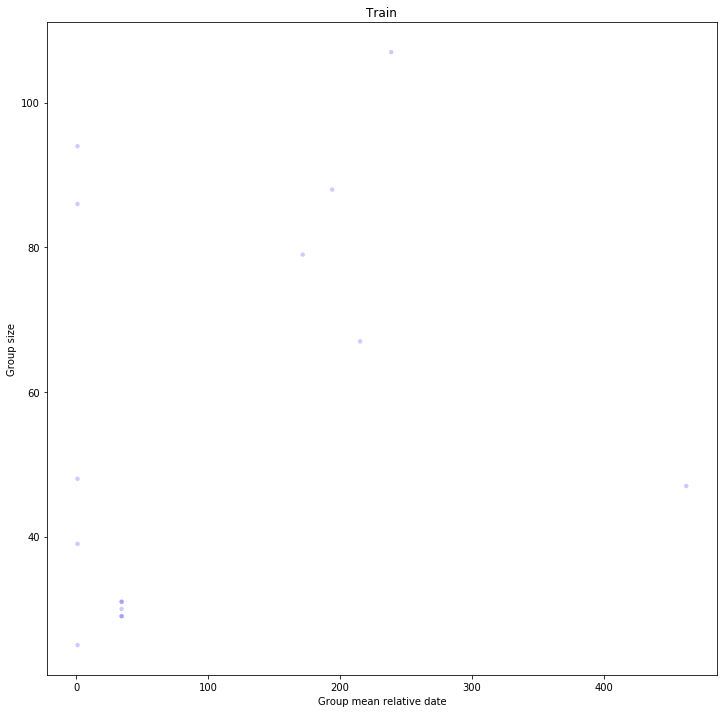

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(g.duration.mean(),g.size(),edgecolor = 'none',alpha = 0.2, s=20, c='b')
plt.xlabel('Group mean relative date')
plt.ylabel('Group size')
plt.title('Train');

In [ ]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(['month', 'item'], as_index=False).aggregate({
                                 'duration': {'min': min, '1q': lambda x: np.percentile(x,25),'median': np.median,
                                                          '3q': lambda x: np.percentile(x,75), 'max': max,
                                                          'std': np.std, 'cv': lambda x: np.median(x)/np.std(x)},
                                 'date':  'first',       # get the first date per group
                                 'network_type': ['nunique', 'count']
                                    }).sort_values(by=[('duration','min')],ascending=False, na_position='last').head(7)


#### crosstab

In [ ]:
pd.crosstab(data.network_type, data.item, margins=True, margins_name="Total")

pd.crosstab(data.network_type, data.item, normalize=True)

**comparing with groub by and pivot table**

crosstabe is more easy to read and do not have the extr steps

In [ ]:
pd.crosstab(data.network_type, data.item)

data.groupby(['network_type', 'item'])['network_type'].count().unstack().fillna(0)

data.pivot_table(index='item', columns='network_type', aggfunc={'network_type':len}, fill_value=0)


#### pivot table

http://pbpython.com/pandas-pivot-table-explained.html



<img src="images/pivot-table-datasheet.png" width="500" align="left"/>

In [ ]:
table = pd.pivot_table(data,index=["item","network_type"],
               values=["duration"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

table

In [ ]:
table.query('network_type == ["data", "sms", "mobile"]')

### Joins


left , right n inner join

| Merge method | SQL Join Name    | Description                               |  
|--------------|----------------- |-------------------------------------------|  
| left         | LEFT OUTER JOIN  | Use keys from left frame only             |  
| right        | RIGHT OUTER JOIN | Use keys from right frame only            |  
| outer        | FULL OUTER JOIN  | Use union of keys from both frames        |  
| inner        | INNER JOIN       | Use intersection of keys from both frames |



In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'], 
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],  
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, how='left', on=['key1', 'key2'])

left

right

result

### Cartesian product or cross join

In [ ]:
df1 = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3']})


df2 = pd.DataFrame({'key1': ['Q0', 'Q1', 'Q2', 'Q3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


# Add dummy key
df1['_tmpkey'] = 1
df2['_tmpkey'] = 1

cartesian_df = pd.merge(df1[['_tmpkey',"A"]], df2[['_tmpkey',"B"]], on='_tmpkey').drop('_tmpkey', axis=1)
#cartesian_df.index = pd.MultiIndex.from_product((df1.index, df2.index))
cartesian_df = cartesian_df.reset_index(drop=True)

df1.drop('_tmpkey', axis=1, inplace=True)
df2.drop('_tmpkey', axis=1, inplace=True)


cartesian_df.head(11)

### High performance eval n query

https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html

Motivations
for large df n arrays eval n query are faster
